In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.initializers as init
import matplotlib.pyplot as plt
import seaborn as sns               # (boxplot, contourplot)

C:\Users\wjssm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#https://www.kaggle.com/ahalaa/churn-model-using-random-forest-vsm-and-ann/notebook

In [2]:
df = pd.read_csv('./Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### 데이터 전처리

In [5]:
# numeric인데 object(categorical)로 되어있는 것 numeric으로 바꿔줌
df['TotalCharges_new']= pd.to_numeric(df.TotalCharges, errors='coerce_numeric')

# NA가 생겼는지 확인
df.loc[pd.isna(df.TotalCharges_new),'TotalCharges']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [6]:
# 위의 11개 NA값을 원래 값으로 채워줌
TotalCharges_Missing=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]
df.loc[pd.isnull(df.TotalCharges_new),'TotalCharges_new']=TotalCharges_Missing

In [7]:
# 변수 바꿔주고 customerID 빼고 전체 다시 확인
df.TotalCharges=df.TotalCharges_new
df.drop(['customerID','TotalCharges_new'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [8]:
# cateogirlcal 변수들의 level 확인
df.dtypes=='object'
categorical_var=[i for i in df.columns if df[i].dtypes=='object']
for z in categorical_var:
    print(df[z].name,':',df[z].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [9]:
# 위에서 "No internet service"같은 것은 "No"로 바꿔줌
Dual_features= ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in Dual_features:
    df[i]=df[i].apply(lambda x: 'No' if x=='No internet service' else x)
df.MultipleLines=df.MultipleLines.apply(lambda x: 'No' if x=='No phone service' else x)

In [10]:
# 확인
for z in [i for i in df.columns if df[i].dtypes=='object']:
    print(df[z].name,':',df[z].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [11]:
# 2-class cateogorical 변수 -> sklearn 패키지의 함수로 dummy 변수(0,1)로 바꿔줌
label_encoder = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    df[x]= label_encoder.fit_transform(df[x])
    
# 3개이상 class의 cateogorical 변수 -> pandas 이용해서 dummy 변수로 바꿔줌 
df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [12]:
# 확인
[[x, df[x].unique()] for x in [i for i in df.columns if len(df[i].unique())<10]]

[['gender', array([0, 1], dtype=int64)],
 ['SeniorCitizen', array([0, 1], dtype=int64)],
 ['Partner', array([1, 0], dtype=int64)],
 ['Dependents', array([0, 1], dtype=int64)],
 ['PhoneService', array([0, 1], dtype=int64)],
 ['MultipleLines', array([0, 1], dtype=int64)],
 ['OnlineSecurity', array([0, 1], dtype=int64)],
 ['OnlineBackup', array([1, 0], dtype=int64)],
 ['DeviceProtection', array([0, 1], dtype=int64)],
 ['TechSupport', array([0, 1], dtype=int64)],
 ['StreamingTV', array([0, 1], dtype=int64)],
 ['StreamingMovies', array([0, 1], dtype=int64)],
 ['PaperlessBilling', array([1, 0], dtype=int64)],
 ['Churn', array([0, 1], dtype=int64)],
 ['InternetService_Fiber optic', array([0, 1], dtype=uint64)],
 ['InternetService_No', array([0, 1], dtype=uint64)],
 ['Contract_One year', array([0, 1], dtype=uint64)],
 ['Contract_Two year', array([0, 1], dtype=uint64)],
 ['PaymentMethod_Credit card (automatic)', array([0, 1], dtype=uint64)],
 ['PaymentMethod_Electronic check', array([1, 0], dty

In [13]:
X = df[['TotalCharges', 'InternetService_Fiber optic', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling', 'TechSupport', 'OnlineSecurity', 'PhoneService', 'InternetService_No', 'tenure']]
 ### SVM으로 classification했을 때 변수 중요도가 높은 10개의 변수만 선택
y = df['Churn']                # target 변수 y

# train, text 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# Scale 조정!!!
sc = StandardScaler()
X_train = sc.fit_transform(X_train)                 # fit_transform: fit(μ and σ 계산) + transform
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = sc.fit_transform(X_test)                   # X_train에서 fit한 걸로 transform

X_train.head()

,TotalCharges,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaperlessBilling,TechSupport,OnlineSecurity,PhoneService,InternetService_No,tenure
0,1.702610,-0.888655,-0.516093,1.793618,-1.214659,1.580942,1.574778,0.326254,-0.526281,1.612532
1,-0.711543,-0.888655,-0.516093,-0.557532,0.823277,-0.632534,-0.635010,-3.065099,-0.526281,-0.747907
2,-0.210523,-0.888655,-0.516093,1.793618,-1.214659,-0.632534,-0.635010,0.326254,1.900125,1.571835
3,0.051249,-0.888655,1.937635,-0.557532,0.823277,1.580942,-0.635010,0.326254,-0.526281,0.025340
4,0.988540,1.125296,-0.516093,-0.557532,0.823277,-0.632534,1.574778,0.326254,-0.526281,0.595101


# SVM

In [15]:
from sklearn.svm import SVC

In [16]:
svm_classifier= SVC(probability=True)
svm_classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
svm_prob = svm_classifier.predict_proba(X_test)[:,1]

In [18]:
y_pred_svm = np.zeros_like(y_test)

In [19]:
from sklearn.metrics import recall_score,accuracy_score

In [20]:
p_range = np.arange(0.1,1,0.1)
svm_recall = np.zeros_like(p_range)
svm_acc = np.zeros_like(p_range)

In [21]:
for i in range(len(p_range)) :
    y_pred_svm = np.zeros_like(y_test)
    y_pred_svm[np.where(svm_prob>=p_range[i])]=1
    y_pred_svm[np.where(svm_prob<p_range[i])]=0
    
    svm_recall[i] = recall_score(y_test, y_pred_svm, average=None)[1]
    svm_acc[i] = accuracy_score(y_test,y_pred_svm)


In [22]:
svm_recall

array([0.99456522, 0.61413043, 0.54347826, 0.51630435, 0.47554348,
       0.39130435, 0.28804348, 0.        , 0.        ])

In [23]:
svm_acc

array([0.26117814, 0.78211498, 0.78921221, 0.79701916, 0.79843861,
       0.78850248, 0.77998581, 0.73882186, 0.73882186])

In [24]:
from matplotlib import pyplot as plt

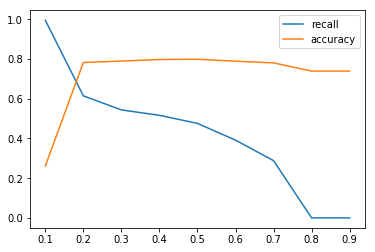

In [25]:
plt.plot(p_range,svm_recall,label = "recall")
plt.plot(p_range,svm_acc, label = "accuracy")
plt.legend()

In [26]:
#cutoff 0.2
y_pred_svm[np.where(svm_prob>=0.3)]=1
y_pred_svm[np.where(svm_prob<0.3)]=0
#Classification Report
print(classification_report(y_test,y_pred_svm))

             precision    recall  f1-score   support

          0       0.84      0.88      0.86      1041
          1       0.61      0.54      0.57       368

avg / total       0.78      0.79      0.79      1409



Text(91.68,0.5,'predicted label')

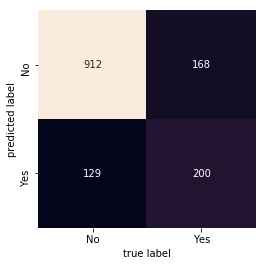

In [27]:
#Confusion Matrix
mat_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat_svm.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

# logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
logis_prob = logreg.predict_proba(X_test)[:,1]

In [31]:
y_pred_logis = np.zeros_like(y_test)

In [32]:
logis_recall = np.zeros_like(p_range)
logis_acc = np.zeros_like(p_range)

In [33]:
for i in range(len(p_range)) :
    y_pred_logis = np.zeros_like(y_test)
    y_pred_logis[np.where(logis_prob>=p_range[i])]=1
    y_pred_logis[np.where(logis_prob<p_range[i])]=0
    
    logis_recall[i] = recall_score(y_test, y_pred_logis, average=None)[1]
    logis_acc[i] = accuracy_score(y_test,y_pred_logis)


In [34]:
logis_recall

array([0.93478261, 0.86413043, 0.76630435, 0.68206522, 0.56521739,
       0.38586957, 0.17663043, 0.        , 0.        ])

In [35]:
logis_acc

array([0.59545777, 0.68701207, 0.74095103, 0.77288857, 0.80198722,
       0.7920511 , 0.76933996, 0.73882186, 0.73882186])

In [36]:
from matplotlib import pyplot as plt

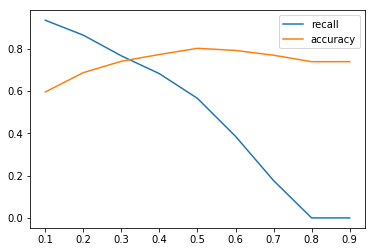

In [37]:
plt.plot(p_range,logis_recall,label = "recall")
plt.plot(p_range,logis_acc, label = "accuracy")
plt.legend()

In [110]:
#cutoff 0.2
y_pred_logis[np.where(logis_prob>=0.3)]=1
y_pred_logis[np.where(logis_prob<0.3)]=0
#Classification Report
print(classification_report(y_test,y_pred_logis))

             precision    recall  f1-score   support

          0       0.90      0.73      0.81      1041
          1       0.50      0.77      0.61       368

avg / total       0.80      0.74      0.75      1409



Text(91.68,0.5,'predicted label')

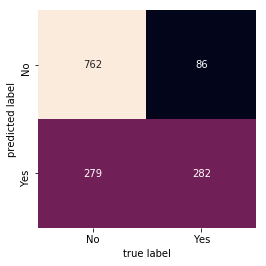

In [111]:
#Confusion Matrix
mat_logis = confusion_matrix(y_test, y_pred_logis)
sns.heatmap(mat_logis.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

## DNN Modeling


In [16]:
### Tuning
# hidden layer 수: 3
# node 수: (24, 12, 8)
# optimizer: Adam
# epoch 수: 20

In [115]:
model = Sequential()   #Initiate DNN Classifier
X_train.shape

(5634, 10)

In [116]:
n_hidden1, n_hidden2, n_hidden3 = 24, 12, 8

In [117]:
# Hidden Layer1 (He 초기값)
model.add(Dense(n_hidden1, activation='relu', kernel_initializer=init.he_normal(), input_dim=10))
Dropout(0.5)
# Hidden Layer2 (He 초기값)
model.add(Dense(n_hidden2, activation='relu', kernel_initializer=init.he_normal()))
Dropout(0.5)
# Hidden Layer3 (He 초기값)
model.add(Dense(n_hidden3, activation='relu', kernel_initializer=init.he_normal()))
Dropout(0.5)
# output Layer (Xaiver 초기값)
model.add(Dense(1, activation='sigmoid', kernel_initializer=init.glorot_normal()))
Dropout(0.5)
# compiling
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                264       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 677
Trainable params: 677
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.fit(X_train, y_train, batch_size=50, epochs=100, validation_data=(X_test, y_test))

Train on 5634 samples, validate on 1409 samples
Epoch 1/100
5634/5634 [==============================] - 1s 164us/step - loss: 0.6752 - acc: 0.5852 - val_loss: 0.5164 - val_acc: 0.7850
Epoch 2/100
5634/5634 [==============================] - 0s 46us/step - loss: 0.4612 - acc: 0.7849 - val_loss: 0.4411 - val_acc: 0.8013
Epoch 3/100
5634/5634 [==============================] - 0s 48us/step - loss: 0.4325 - acc: 0.7953 - val_loss: 0.4380 - val_acc: 0.8006
Epoch 4/100
5634/5634 [==============================] - 0s 47us/step - loss: 0.4276 - acc: 0.7939 - val_loss: 0.4381 - val_acc: 0.8006
Epoch 5/100
5634/5634 [==============================] - 0s 48us/step - loss: 0.4243 - acc: 0.7955 - val_loss: 0.4369 - val_acc: 0.7999
Epoch 6/100
5634/5634 [==============================] - 0s 46us/step - loss: 0.4231 - acc: 0.7939 - val_loss: 0.4378 - val_acc: 0.7963
Epoch 7/100
5634/5634 [==============================] - 0s 46us/step - loss: 0.4215 - acc: 0.7971 - val_loss: 0.4360 - val_acc: 0.7999

## Prediction

In [126]:
# test data로 예측
y_pred_prob = model.predict(X_test)
y_pred_prob.shape
y_pred_prob

array([[0.06543279],
       [0.16614945],
       [0.18394497],
       ...,
       [0.23811358],
       [0.23942691],
       [0.61726815]], dtype=float32)

In [127]:
dnn_recall = np.zeros_like(p_range)
dnn_acc = np.zeros_like(p_range)

In [129]:
for i in range(len(p_range)) :
    y_pred = np.zeros_like(y_pred_prob)
    y_pred[np.where(y_pred_prob>=p_range[i])]=1
    y_pred[np.where(y_pred_prob<p_range[i])]=0
    
    dnn_recall[i] = recall_score(y_test, y_pred, average=None)[1]
    dnn_acc[i] = accuracy_score(y_test,y_pred)

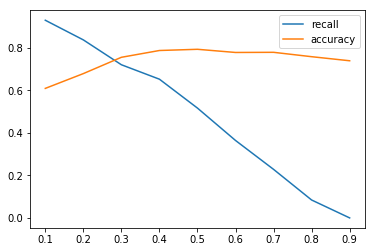

In [130]:
plt.plot(p_range,dnn_recall,label = "recall")
plt.plot(p_range,dnn_acc, label = "accuracy")
plt.legend()

In [27]:
y_pred = (y_pred_prob > 0.3).astype('int')   # 확률로 예측된 값을 0, 1로 바꿔줌

In [28]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.89      0.74      0.81      1041
          1       0.50      0.74      0.60       368

avg / total       0.79      0.74      0.75      1409



Text(91.68,0.5,'predicted label')

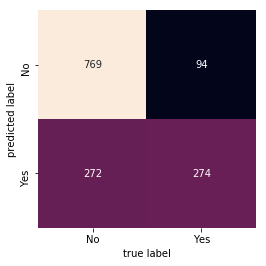

In [29]:
# Confusion Matrix
mat_ann = confusion_matrix(y_test, y_pred)
sns.heatmap(mat_ann.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')